In [9]:
!pip install selectivesearch


Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [10]:
import selectivesearch
import cv2
import matplotlib.pyplot as plt
import os
%matplotlib inline

img shape: (750, 749, 3)


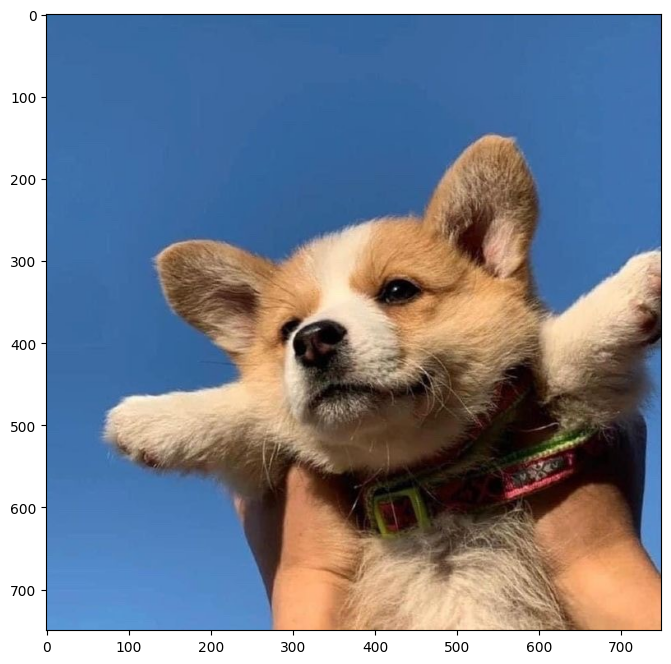

In [12]:
img=cv2.imread('dog.jpg')
img_rgb=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape:', img.shape)

plt.figure(figsize=(8,8))
plt.imshow(img_rgb)
plt.show()

In [13]:
# 첫번째 변수명은 큰 의미가 없으므로 언더바로 표현
_, regions = selectivesearch.selective_search(img_rgb, scale=100, min_size=2000)

print(type(regions), len(regions))

/home/a202192010/.local/lib/python3.8/site-packages/skimage/feature/texture.py:353: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


<class 'list'> 111


In [14]:
regions

[{'rect': (0, 0, 174, 271), 'size': 19988, 'labels': [0.0]},
 {'rect': (104, 0, 167, 255), 'size': 14621, 'labels': [1.0]},
 {'rect': (168, 0, 332, 175), 'size': 18176, 'labels': [2.0]},
 {'rect': (272, 0, 170, 44), 'size': 4291, 'labels': [3.0]},
 {'rect': (288, 0, 165, 49), 'size': 2213, 'labels': [4.0]},
 {'rect': (472, 0, 71, 129), 'size': 3322, 'labels': [5.0]},
 {'rect': (499, 0, 60, 136), 'size': 2656, 'labels': [6.0]},
 {'rect': (528, 0, 111, 149), 'size': 8028, 'labels': [7.0]},
 {'rect': (576, 0, 172, 305), 'size': 33076, 'labels': [8.0]},
 {'rect': (720, 16, 28, 257), 'size': 3937, 'labels': [9.0]},
 {'rect': (636, 26, 67, 113), 'size': 3368, 'labels': [10.0]},
 {'rect': (0, 64, 79, 79), 'size': 4624, 'labels': [11.0]},
 {'rect': (376, 64, 195, 97), 'size': 4216, 'labels': [12.0]},
 {'rect': (207, 72, 344, 151), 'size': 20382, 'labels': [13.0]},
 {'rect': (512, 80, 101, 199), 'size': 4518, 'labels': [14.0]},
 {'rect': (0, 128, 144, 207), 'size': 21730, 'labels': [15.0]},
 {'

In [16]:
cand_rects = [cand['rect'] for cand in regions]
print(cand_rects)

[(0, 0, 174, 271), (104, 0, 167, 255), (168, 0, 332, 175), (272, 0, 170, 44), (288, 0, 165, 49), (472, 0, 71, 129), (499, 0, 60, 136), (528, 0, 111, 149), (576, 0, 172, 305), (720, 16, 28, 257), (636, 26, 67, 113), (0, 64, 79, 79), (376, 64, 195, 97), (207, 72, 344, 151), (512, 80, 101, 199), (0, 128, 144, 207), (176, 136, 320, 160), (372, 149, 184, 216), (490, 167, 105, 138), (171, 184, 314, 143), (564, 202, 151, 167), (0, 208, 191, 330), (528, 246, 56, 73), (112, 256, 134, 151), (295, 261, 131, 192), (141, 280, 89, 71), (184, 280, 151, 119), (442, 287, 169, 152), (585, 290, 163, 166), (157, 327, 126, 61), (627, 333, 121, 181), (399, 343, 137, 105), (200, 358, 112, 77), (302, 373, 91, 93), (92, 380, 150, 81), (71, 392, 261, 116), (455, 408, 104, 69), (717, 411, 31, 271), (367, 415, 285, 253), (270, 429, 261, 143), (558, 461, 130, 143), (87, 469, 204, 73), (0, 472, 271, 277), (558, 484, 190, 202), (255, 507, 140, 184), (185, 515, 122, 234), (71, 519, 182, 158), (119, 519, 131, 112), (3

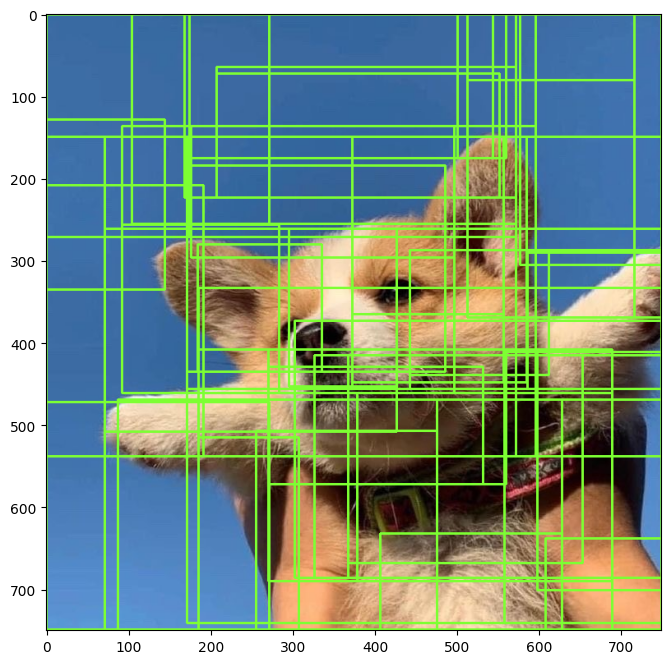

In [20]:
green_rgb = (125, 255, 51) # bounding box color
img_rgb_copy = img_rgb.copy() # 이미지 복사

for rect in cand_rects:
  left = rect[0]
  top = rect[1]
  # rect[2], rect[3]은 너비와 높이이므로 우하단 좌표를 구하기 위해 좌상단 좌표에 각각을 더함.
  right = left + rect[2]
  bottom = top + rect[3]
  img_rgb_copy = cv2.rectangle(img_rgb_copy, (left, top), (right, bottom), color=green_rgb, thickness=2)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb_copy)
plt.show()

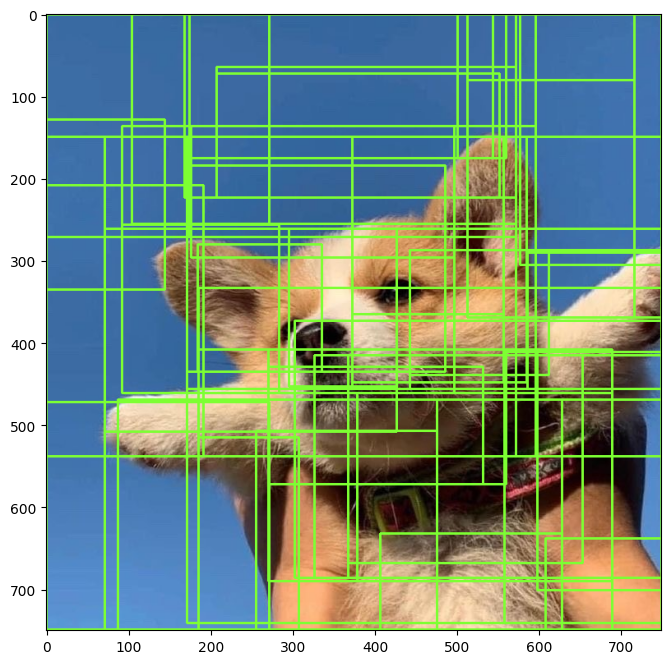

In [21]:
cand_rects = [cand['rect'] for cand in regions if cand['size']>10000] # size가 10000보다 큰 경우만 추출

for rect in cand_rects:
  left = rect[0]
  top = rect[1]
  # rect[2], rect[3]은 너비와 높이이므로 우하단 좌표를 구하기 위해 좌상단 좌표에 각각을 더함.
  right = left + rect[2]
  bottom = top + rect[3]
  img_rgb_copy = cv2.rectangle(img_rgb_copy, (left, top), (right, bottom), color=green_rgb, thickness=2)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb_copy)
plt.show()

### IOU

In [31]:
import numpy as np

def compute_iou(cand_box, gt_box):

  # Calculate intersection areas
  x1 = np.maximum(cand_box[0], gt_box[0])
  y1 = np.maximum(cand_box[1], gt_box[1])
  x2 = np.maximum(cand_box[2], gt_box[2])
  y2 = np.maximum(cand_box[3], gt_box[3])

  intersection = np.maximum(x2 - x1, 0) * np.maximum(y2 - y1, 0)

  cand_box_area = (cand_box[2] - cand_box[0]) * (cand_box[3] - cand_box[1])
  gt_box_area = (gt_box[2] - gt_box[0]) * (gt_box[3] - gt_box[1])
  union = cand_box_area + gt_box_area - intersection

  iou = intersection / union
  
  return iou

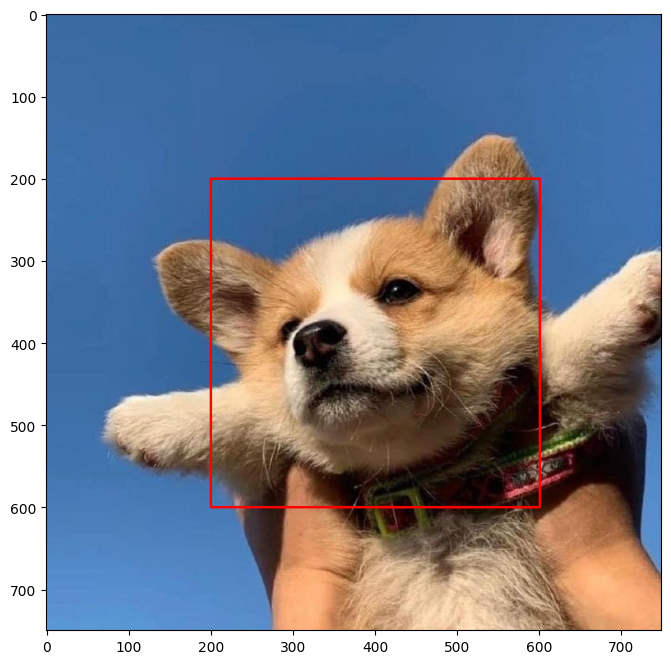

In [27]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# 
gt_box = [200, 200, 600, 600] # ground truth

img = cv2.imread('dog.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

red = (255, 0, 0)
img_rgb = cv2.rectangle(img_rgb, (gt_box[0], gt_box[1]), (gt_box[2], gt_box[3]), color=red, thickness=2)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.show()

In [32]:
import selectivesearch

#selectivesearch.selective_search()는 이미지의 Region Proposal 정보를 반환
img = cv2.imread('dog.jpg')
img_rgb2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

_, regions = selectivesearch.selective_search(img_rgb2, scale=100, min_size=2000)

print(type(regions), len(regions))

<class 'list'> 111


In [33]:
cand_rects = [cand['rect'] for cand in regions] # 튜플형 반환

for index, cand_box in enumerate(cand_rects):
    cand_box = list(cand_box)
    cand_box[2] += cand_box[0]
    cand_box[3] += cand_box[1]

    iou = compute_iou(cand_box, gt_box)
    print('index:', index, "iou:", iou)

index: 0 iou: 3.3931373796496587
index: 1 iou: 3.757191499354233
index: 2 iou: 2.7538726333907055
index: 3 iou: 3.6163175303197352
index: 4 iou: 2.883215894651727
index: 5 iou: 0.4340491187616036
index: 6 iou: 0.31621790857858484
index: 7 iou: 0.3360098078538509
index: 8 iou: 0.4789085340387025
index: 9 iou: 0.07179671273622401
index: 10 iou: 0.19038012090558426
index: 11 iou: 25.636917160711423
index: 12 iou: 1.0031909533672956
index: 13 iou: 2.8715475668566417
index: 14 iou: 0.2891931939383961
index: 15 iou: 5.367686527106817
index: 16 iou: 3.125
index: 17 iou: 0.8402122641509434
index: 18 iou: 0.33719058931718904
index: 19 iou: 3.5633156652264932
index: 20 iou: 0.4803267289540358
index: 21 iou: 2.367507171976446
index: 22 iou: 0.1838961038961039
index: 23 iou: 3.227471032509265
index: 24 iou: 1.264662353070685
index: 25 iou: 3.34037944622772
index: 26 iou: 2.5615881846744983
index: 27 iou: 0.39834777959349654
index: 28 iou: 0.3701072307512012
index: 29 iou: 1.8671134972472045
index:

In [34]:
cand_rects = [cand['rect'] for cand in regions if cand['size'] > 5000]
cand_rects.sort()
cand_rects

[(0, 0, 174, 271),
 (0, 0, 571, 271),
 (0, 0, 571, 538),
 (0, 0, 595, 538),
 (0, 0, 748, 538),
 (0, 0, 748, 538),
 (0, 0, 748, 538),
 (0, 0, 748, 749),
 (0, 128, 144, 207),
 (0, 149, 748, 600),
 (0, 149, 748, 600),
 (0, 208, 191, 330),
 (0, 472, 271, 277),
 (0, 472, 271, 277),
 (71, 149, 677, 600),
 (71, 261, 355, 247),
 (71, 261, 677, 488),
 (71, 392, 261, 116),
 (71, 519, 182, 158),
 (87, 469, 204, 73),
 (87, 469, 388, 280),
 (87, 469, 540, 280),
 (87, 469, 540, 280),
 (87, 469, 661, 280),
 (92, 136, 404, 325),
 (92, 136, 503, 325),
 (92, 256, 154, 205),
 (92, 256, 191, 205),
 (104, 0, 167, 255),
 (104, 0, 467, 255),
 (141, 280, 142, 108),
 (168, 0, 332, 175),
 (168, 0, 332, 175),
 (168, 0, 332, 175),
 (168, 0, 375, 175),
 (168, 0, 391, 175),
 (168, 0, 403, 223),
 (171, 149, 577, 307),
 (171, 149, 577, 592),
 (171, 184, 314, 251),
 (176, 136, 320, 160),
 (184, 280, 151, 119),
 (184, 280, 151, 155),
 (185, 333, 563, 416),
 (185, 333, 563, 416),
 (185, 408, 503, 341),
 (185, 515, 122, 

img shape:  (750, 749, 3)


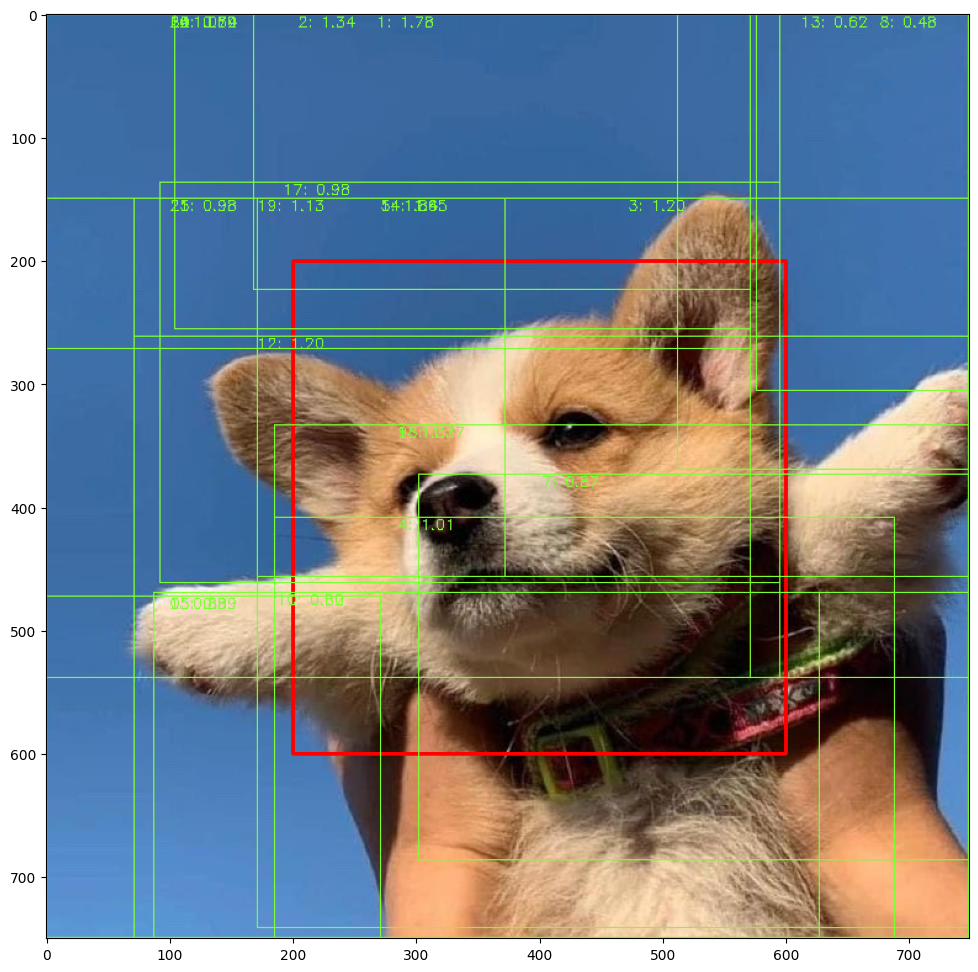

In [49]:
img = cv2.imread('dog.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape: ', img.shape)

green_rgb = (125, 255, 51)
cand_rects = [cand['rect'] for cand in regions if cand['size'] > 40000]
gt_box = [200, 200, 600, 600] # ground truth
img_rgb = cv2.rectangle(img_rgb, (gt_box[0], gt_box[1]), (gt_box[2], gt_box[3]), color=red, thickness=2)

for index, cand_box in enumerate(cand_rects):
  
  cand_box = list(cand_box)
  cand_box[2] += cand_box[0]
  cand_box[3] += cand_box[1]

  iou = compute_iou(cand_box, gt_box)

  if iou > 0.3:
    #print('index:', index, "iou:", iou, 'rectangle: ', (cand_box[0], cand_box[1], cand_box[2], cand_box[3]))
    cv2.rectangle(img_rgb, (cand_box[0], cand_box[1]), (cand_box[2], cand_box[3]), color=green_rgb, thickness=1)
    text = "{}: {:.2f}".format(index, iou)
    cv2.putText(img_rgb, text, (cand_box[0]+100, cand_box[1]+10), cv2.FONT_HERSHEY_SIMPLEX, 0.4, color=green_rgb, thickness=1)

plt.figure(figsize=(12,12))
plt.imshow(img_rgb)
plt.show()